In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
from datetime import datetime

# Read the CSV into a Pandas DataFrame
intake_csv = "Resources/Austin_Animal_Center_Intakes.csv"
outcome_csv= "Resources/Austin_Animal_Center_Outcomes.csv"

intake_df = pd.read_csv(intake_csv)
outcome_df = pd.read_csv(outcome_csv)

#convert date variable to datetime format
# Read the CSV into a Pandas DataFrame
intake_df = pd.read_csv(intake_csv, index_col='Animal ID', parse_dates=["DateTime", "MonthYear"])
outcome_df = pd.read_csv(outcome_csv, index_col='Animal ID', parse_dates=["DateTime", "MonthYear"])

#intake_df['DateTime'] = pd.to_datetime(intake_df['DateTime']).dt.date
#outcome_df['DateTime'] = pd.to_datetime(outcome_df['DateTime']).dt.date

#update intake file with column reflecting number of intakes
#and select outcomes for animals with 1 or 2 intakes
intake_counts=intake_df.groupby(['Animal ID']).size().reset_index(name='counts')
intake_df=pd.merge(intake_df, intake_counts, on="Animal ID", how="outer")
reduced_intake_df=intake_df.query('counts <3')

#update outtake file with column reflecting number of intakes per animal
#and select outcomes for animals with 1 or 2 intakes
outcome_df=pd.merge(outcome_df, intake_counts, on="Animal ID", how="left")
reduced_outcome_df=outcome_df.query('counts <3')
#reduced_outcome_df=reduced_outcome_df.drop(columns=['counts'])



In [2]:
outcome_df

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,counts
0,A741715,*Pebbles,2017-01-11 18:17:00,2017-01-11 18:17:00,03/07/2016,Adoption,NaN,Cat,Spayed Female,10 months,Domestic Shorthair Mix,Calico,1.0
1,A658751,Benji,2016-11-13 13:38:00,2016-11-13 13:38:00,07/14/2011,Return to Owner,NaN,Dog,Neutered Male,5 years,Border Terrier Mix,Tan,2.0
2,A721285,NaN,2016-02-24 14:42:00,2016-02-24 14:42:00,02/24/2014,Euthanasia,Suffering,Other,Unknown,2 years,Raccoon Mix,Black/Gray,1.0
3,A707443,NaN,2015-07-13 13:50:00,2015-07-13 13:50:00,06/21/2015,Transfer,Partner,Cat,Intact Female,3 weeks,Domestic Longhair Mix,Black Smoke,1.0
4,A684346,NaN,2014-07-22 16:04:00,2014-07-22 16:04:00,07/07/2014,Transfer,Partner,Cat,Intact Male,2 weeks,Domestic Shorthair Mix,Orange Tabby,1.0
5,A666430,Lucy,2013-11-07 11:47:00,2013-11-07 11:47:00,11/06/2012,Transfer,Partner,Dog,Spayed Female,1 year,Beagle Mix,White/Brown,1.0
6,A675708,*Johnny,2014-06-03 14:20:00,2014-06-03 14:20:00,03/31/2013,Adoption,NaN,Dog,Neutered Male,1 year,Pit Bull,Blue/White,1.0
7,A680386,Monday,2014-06-15 15:50:00,2014-06-15 15:50:00,06/02/2005,Transfer,Partner,Dog,Neutered Male,9 years,Miniature Schnauzer Mix,White,1.0
8,A683115,NaN,2014-07-07 14:04:00,2014-07-07 14:04:00,01/07/2014,Euthanasia,Rabies Risk,Other,Unknown,5 months,Bat Mix,Brown,1.0
9,A713785,NaN,2015-10-19 14:55:00,2015-10-19 14:55:00,05/29/2015,Transfer,Partner,Dog,Neutered Male,4 months,Labrador Retriever Mix,Red,1.0


In [3]:
reduced_outcome_df

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,counts
0,A741715,*Pebbles,2017-01-11 18:17:00,2017-01-11 18:17:00,03/07/2016,Adoption,NaN,Cat,Spayed Female,10 months,Domestic Shorthair Mix,Calico,1.0
1,A658751,Benji,2016-11-13 13:38:00,2016-11-13 13:38:00,07/14/2011,Return to Owner,NaN,Dog,Neutered Male,5 years,Border Terrier Mix,Tan,2.0
2,A721285,NaN,2016-02-24 14:42:00,2016-02-24 14:42:00,02/24/2014,Euthanasia,Suffering,Other,Unknown,2 years,Raccoon Mix,Black/Gray,1.0
3,A707443,NaN,2015-07-13 13:50:00,2015-07-13 13:50:00,06/21/2015,Transfer,Partner,Cat,Intact Female,3 weeks,Domestic Longhair Mix,Black Smoke,1.0
4,A684346,NaN,2014-07-22 16:04:00,2014-07-22 16:04:00,07/07/2014,Transfer,Partner,Cat,Intact Male,2 weeks,Domestic Shorthair Mix,Orange Tabby,1.0
5,A666430,Lucy,2013-11-07 11:47:00,2013-11-07 11:47:00,11/06/2012,Transfer,Partner,Dog,Spayed Female,1 year,Beagle Mix,White/Brown,1.0
6,A675708,*Johnny,2014-06-03 14:20:00,2014-06-03 14:20:00,03/31/2013,Adoption,NaN,Dog,Neutered Male,1 year,Pit Bull,Blue/White,1.0
7,A680386,Monday,2014-06-15 15:50:00,2014-06-15 15:50:00,06/02/2005,Transfer,Partner,Dog,Neutered Male,9 years,Miniature Schnauzer Mix,White,1.0
8,A683115,NaN,2014-07-07 14:04:00,2014-07-07 14:04:00,01/07/2014,Euthanasia,Rabies Risk,Other,Unknown,5 months,Bat Mix,Brown,1.0
9,A713785,NaN,2015-10-19 14:55:00,2015-10-19 14:55:00,05/29/2015,Transfer,Partner,Dog,Neutered Male,4 months,Labrador Retriever Mix,Red,1.0


In [4]:
#now take single intake animals and match with any available outcome
reduced_intake_only_one_df=reduced_intake_df.query('counts <2')
#reduced_intake_only_one_df=reduced_intake_only_one_df.add_prefix('IN_')
reduced_outcome_df=reduced_outcome_df.add_prefix("OUT_")

reduced_intake_only_one_df=reduced_intake_only_one_df.rename(index=str,columns={"IN_Animal ID": "Animal ID"})
reduced_outcome_df=reduced_outcome_df.rename(index=str,columns={"OUT_Animal ID": "Animal ID"})
one_intake_merged=pd.merge(reduced_intake_only_one_df, reduced_outcome_df, on="Animal ID", how="left")

In [5]:
one_intake_merged["num_of_intakes_for_ID"]=1

In [6]:
#now take two intake animals and figure out order of intakes and outcomes
reduced_intake_two_df=reduced_intake_df.query('counts !=1')


In [7]:
reduced_intake_two_first_date_lookup_df=reduced_intake_two_df.groupby('Animal ID').aggregate(['min']).reset_index()
reduced_intake_two_first_date_lookup_df = reduced_intake_two_first_date_lookup_df[['Animal ID','DateTime']]
reduced_intake_two_first_date_lookup_df["stay_number"]=1
reduced_intake_two_first_date_lookup_df.columns = reduced_intake_two_first_date_lookup_df.columns.droplevel(1)


reduced_intake_two_first_date_lookup_df.head()

,Animal ID,DateTime,stay_number
0,A245945,2014-07-03 17:55:00,1
1,A282897,2013-11-21 13:45:00,1
2,A287017,2014-12-12 07:04:00,1
3,A304036,2015-06-06 14:34:00,1
4,A307010,2016-09-25 12:51:00,1


In [8]:
reduced_intake_two_second_date_lookup_df=reduced_intake_two_df.groupby('Animal ID').aggregate(['max']).reset_index()
reduced_intake_two_second_date_lookup_df = reduced_intake_two_second_date_lookup_df[['Animal ID','DateTime']]
reduced_intake_two_second_date_lookup_df["stay_number"]=2
reduced_intake_two_second_date_lookup_df.columns = reduced_intake_two_second_date_lookup_df.columns.droplevel(1)

In [9]:
reduced_intake_two_second_date_lookup_df.head()

,Animal ID,DateTime,stay_number
0,A245945,2015-05-20 22:34:00,2
1,A282897,2015-07-06 15:06:00,2
2,A287017,2015-08-16 12:19:00,2
3,A304036,2016-04-19 08:22:00,2
4,A307010,2017-06-01 11:47:00,2


In [10]:
multiple_intakes_order_lookup = reduced_intake_two_first_date_lookup_df.append(reduced_intake_two_second_date_lookup_df)

In [11]:
#multiple_intakes_order_lookup

In [12]:
#reduced_intake_two_df

reduced_intake_two_df=pd.merge(reduced_intake_two_df, multiple_intakes_order_lookup, on=["Animal ID","DateTime"], how="left")
#reduced_intake_two_df

In [13]:
#look at outcome records for the two-intake group and determine order

In [14]:
#reduced_outcome_df

In [15]:

reduced_outcome_two_first_date_lookup_df=reduced_outcome_df.groupby('Animal ID').aggregate(['min']).reset_index()
reduced_outcome_two_first_date_lookup_df = reduced_outcome_two_first_date_lookup_df[['Animal ID','OUT_DateTime']]
reduced_outcome_two_first_date_lookup_df["stay_number"]=1
reduced_outcome_two_first_date_lookup_df.columns = reduced_outcome_two_first_date_lookup_df.columns.droplevel(1)


reduced_outcome_two_first_date_lookup_df.head()

,Animal ID,OUT_DateTime,stay_number
0,A047759,2014-04-07 15:12:00,1
1,A134067,2013-11-16 11:54:00,1
2,A141142,2013-11-17 11:40:00,1
3,A163459,2014-11-14 19:28:00,1
4,A165752,2014-09-15 16:35:00,1


In [16]:
reduced_outcome_df=pd.merge(reduced_outcome_df, reduced_outcome_two_first_date_lookup_df, on=["Animal ID","OUT_DateTime"], how="left")

reduced_outcome_df

,Animal ID,OUT_Name,OUT_DateTime,OUT_MonthYear,OUT_Date of Birth,OUT_Outcome Type,OUT_Outcome Subtype,OUT_Animal Type,OUT_Sex upon Outcome,OUT_Age upon Outcome,OUT_Breed,OUT_Color,OUT_counts,stay_number
0,A741715,*Pebbles,2017-01-11 18:17:00,2017-01-11 18:17:00,03/07/2016,Adoption,NaN,Cat,Spayed Female,10 months,Domestic Shorthair Mix,Calico,1.0,1.0
1,A658751,Benji,2016-11-13 13:38:00,2016-11-13 13:38:00,07/14/2011,Return to Owner,NaN,Dog,Neutered Male,5 years,Border Terrier Mix,Tan,2.0,NaN
2,A721285,NaN,2016-02-24 14:42:00,2016-02-24 14:42:00,02/24/2014,Euthanasia,Suffering,Other,Unknown,2 years,Raccoon Mix,Black/Gray,1.0,1.0
3,A707443,NaN,2015-07-13 13:50:00,2015-07-13 13:50:00,06/21/2015,Transfer,Partner,Cat,Intact Female,3 weeks,Domestic Longhair Mix,Black Smoke,1.0,1.0
4,A684346,NaN,2014-07-22 16:04:00,2014-07-22 16:04:00,07/07/2014,Transfer,Partner,Cat,Intact Male,2 weeks,Domestic Shorthair Mix,Orange Tabby,1.0,1.0
5,A666430,Lucy,2013-11-07 11:47:00,2013-11-07 11:47:00,11/06/2012,Transfer,Partner,Dog,Spayed Female,1 year,Beagle Mix,White/Brown,1.0,1.0
6,A675708,*Johnny,2014-06-03 14:20:00,2014-06-03 14:20:00,03/31/2013,Adoption,NaN,Dog,Neutered Male,1 year,Pit Bull,Blue/White,1.0,1.0
7,A680386,Monday,2014-06-15 15:50:00,2014-06-15 15:50:00,06/02/2005,Transfer,Partner,Dog,Neutered Male,9 years,Miniature Schnauzer Mix,White,1.0,1.0
8,A683115,NaN,2014-07-07 14:04:00,2014-07-07 14:04:00,01/07/2014,Euthanasia,Rabies Risk,Other,Unknown,5 months,Bat Mix,Brown,1.0,1.0
9,A713785,NaN,2015-10-19 14:55:00,2015-10-19 14:55:00,05/29/2015,Transfer,Partner,Dog,Neutered Male,4 months,Labrador Retriever Mix,Red,1.0,1.0


In [17]:
reduced_outcome_df['stay_number']=reduced_outcome_df['stay_number'].fillna(2)
#reduced_outcome_df

In [18]:
#reduced_intake_two_df=reduced_intake_two_df.add_prefix('IN_')
reduced_intake_two_df=reduced_intake_two_df.rename(index=str,columns={"IN_Animal ID": "Animal ID","IN_stay_number":"stay_number"})
reduced_intake_two_df

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,counts,stay_number
0,A683798,Mustachala,2016-07-21 12:16:00,2016-07-21 12:16:00,3118 Windsor Rd in Austin (TX),Stray,Normal,Cat,Spayed Female,3 years,Domestic Medium Hair Mix,White/Black,2,2
1,A683798,Mustachala,2014-07-15 15:38:00,2014-07-15 15:38:00,Austin (TX),Owner Surrender,Normal,Cat,Intact Female,1 year,Domestic Medium Hair Mix,White/Black,2,1
2,A663489,Precious,2014-12-17 14:21:00,2014-12-17 14:21:00,Garland Ave in Austin (TX),Stray,Normal,Dog,Spayed Female,2 years,Chihuahua Shorthair/Rat Terrier,Tricolor,2,1
3,A663489,Precious,2016-08-20 17:22:00,2016-08-20 17:22:00,4106 N Lamar Blvd in Austin (TX),Stray,Normal,Dog,Spayed Female,4 years,Chihuahua Shorthair/Rat Terrier,Tricolor,2,2
4,A741209,*Girly,2017-05-17 11:26:00,2017-05-17 11:26:00,21034 Cameron in Manor (TX),Stray,Normal,Dog,Intact Female,1 year,Pit Bull Mix,White,2,2
5,A741209,*Girly,2016-12-29 13:32:00,2016-12-29 13:32:00,21034 Cameron in Travis (TX),Stray,Normal,Dog,Intact Female,1 year,Pit Bull Mix,White,2,1
6,A761051,Bluebell,2018-06-28 14:23:00,2018-06-28 14:23:00,Austin (TX),Owner Surrender,Normal,Dog,Spayed Female,1 year,Soft Coated Wheaten Terrier Mix,Tan/White,2,2
7,A761051,Bluebell,2017-10-28 12:39:00,2017-10-28 12:39:00,3118 Windsor Road in Austin (TX),Stray,Normal,Dog,Spayed Female,1 year,Soft Coated Wheaten Terrier Mix,Tan/White,2,1
8,A696008,Gunnar,2015-01-27 14:35:00,2015-01-27 14:35:00,120 Webberwood Way in Travis (TX),Stray,Normal,Dog,Intact Male,2 months,Australian Cattle Dog/German Shepherd,Sable,2,1
9,A696008,Gunnar,2016-05-02 15:15:00,2016-05-02 15:15:00,Austin (TX),Public Assist,Normal,Dog,Neutered Male,1 year,Australian Cattle Dog/German Shepherd,Sable,2,2


In [19]:
#merge the multiple intake with coressponsing outcomes - will not yield two outcomes for animals still in residence
two_intakes_merged=pd.merge(reduced_intake_two_df, reduced_outcome_df, on=["Animal ID", "stay_number"], how="left")
two_intakes_merged["num_of_intakes_for_ID"]="2"

In [20]:
two_intakes_merged


,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,...,OUT_Date of Birth,OUT_Outcome Type,OUT_Outcome Subtype,OUT_Animal Type,OUT_Sex upon Outcome,OUT_Age upon Outcome,OUT_Breed,OUT_Color,OUT_counts,num_of_intakes_for_ID
0,A683798,Mustachala,2016-07-21 12:16:00,2016-07-21 12:16:00,3118 Windsor Rd in Austin (TX),Stray,Normal,Cat,Spayed Female,3 years,...,01/15/2013,Adoption,Foster,Cat,Spayed Female,3 years,Domestic Medium Hair Mix,White/Black,2.0,2
1,A683798,Mustachala,2014-07-15 15:38:00,2014-07-15 15:38:00,Austin (TX),Owner Surrender,Normal,Cat,Intact Female,1 year,...,01/15/2013,Adoption,NaN,Cat,Spayed Female,1 year,Domestic Medium Hair Mix,White/Black,2.0,2
2,A663489,Precious,2014-12-17 14:21:00,2014-12-17 14:21:00,Garland Ave in Austin (TX),Stray,Normal,Dog,Spayed Female,2 years,...,03/19/2012,Return to Owner,NaN,Dog,Spayed Female,2 years,Chihuahua Shorthair/Rat Terrier,Tricolor,2.0,2
3,A663489,Precious,2016-08-20 17:22:00,2016-08-20 17:22:00,4106 N Lamar Blvd in Austin (TX),Stray,Normal,Dog,Spayed Female,4 years,...,03/19/2012,Return to Owner,NaN,Dog,Spayed Female,4 years,Chihuahua Shorthair/Rat Terrier,Tricolor,2.0,2
4,A741209,*Girly,2017-05-17 11:26:00,2017-05-17 11:26:00,21034 Cameron in Manor (TX),Stray,Normal,Dog,Intact Female,1 year,...,12/29/2015,Adoption,NaN,Dog,Spayed Female,1 year,Pit Bull Mix,White,2.0,2
5,A741209,*Girly,2016-12-29 13:32:00,2016-12-29 13:32:00,21034 Cameron in Travis (TX),Stray,Normal,Dog,Intact Female,1 year,...,12/29/2015,Return to Owner,NaN,Dog,Intact Female,1 year,Pit Bull Mix,White,2.0,2
6,A761051,Bluebell,2018-06-28 14:23:00,2018-06-28 14:23:00,Austin (TX),Owner Surrender,Normal,Dog,Spayed Female,1 year,...,10/28/2016,Adoption,NaN,Dog,Spayed Female,1 year,Soft Coated Wheaten Terrier Mix,Tan/White,2.0,2
7,A761051,Bluebell,2017-10-28 12:39:00,2017-10-28 12:39:00,3118 Windsor Road in Austin (TX),Stray,Normal,Dog,Spayed Female,1 year,...,10/28/2016,Adoption,NaN,Dog,Spayed Female,1 year,Soft Coated Wheaten Terrier Mix,Tan/White,2.0,2
8,A696008,Gunnar,2015-01-27 14:35:00,2015-01-27 14:35:00,120 Webberwood Way in Travis (TX),Stray,Normal,Dog,Intact Male,2 months,...,11/12/2014,Adoption,NaN,Dog,Neutered Male,2 months,Australian Cattle Dog/German Shepherd,Sable,2.0,2
9,A696008,Gunnar,2016-05-02 15:15:00,2016-05-02 15:15:00,Austin (TX),Public Assist,Normal,Dog,Neutered Male,1 year,...,11/12/2014,Return to Owner,NaN,Dog,Neutered Male,1 year,Australian Cattle Dog/German Shepherd,Sable,2.0,2


In [21]:
one_intake_merged

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,...,OUT_Date of Birth,OUT_Outcome Type,OUT_Outcome Subtype,OUT_Animal Type,OUT_Sex upon Outcome,OUT_Age upon Outcome,OUT_Breed,OUT_Color,OUT_counts,num_of_intakes_for_ID
0,A748291,*Madison,2017-05-01 14:26:00,2017-05-01 14:26:00,S Pleasant Valley Rd And E Riverside Dr in Aus...,Stray,Normal,Dog,Intact Female,10 months,...,06/01/2016,Transfer,Partner,Dog,Spayed Female,1 year,Pit Bull Mix,Black,1.0,1
1,A750529,NaN,2017-05-28 13:22:00,2017-05-28 13:22:00,8312 North Ih 35 in Austin (TX),Stray,Normal,Dog,Intact Female,5 months,...,12/21/2016,Transfer,Partner,Dog,Spayed Female,5 months,Miniature Schnauzer Mix,White/Cream,1.0,1
2,A730601,NaN,2016-07-07 12:11:00,2016-07-07 12:11:00,1109 Shady Ln in Austin (TX),Stray,Normal,Cat,Intact Male,7 months,...,12/07/2015,Transfer,SCRP,Cat,Neutered Male,7 months,Domestic Shorthair Mix,Blue Tabby,1.0,1
3,A748238,NaN,2017-05-01 10:53:00,2017-05-01 10:53:00,Airport Blvd And Oak Springs Dr in Austin (TX),Stray,Normal,Dog,Intact Male,3 years,...,05/01/2014,Transfer,Partner,Dog,Neutered Male,3 years,Bichon Frise Mix,White,1.0,1
4,A683644,*Zoey,2014-07-13 11:02:00,2014-07-13 11:02:00,Austin (TX),Owner Surrender,Nursing,Dog,Intact Female,4 weeks,...,06/13/2014,Adoption,Foster,Dog,Spayed Female,4 months,Border Collie Mix,Brown/White,1.0,1
5,A676515,Rico,2014-04-11 08:45:00,2014-04-11 08:45:00,615 E. Wonsley in Austin (TX),Stray,Normal,Dog,Intact Male,2 months,...,01/11/2014,Return to Owner,NaN,Dog,Neutered Male,3 months,Pit Bull Mix,White/Brown,1.0,1
6,A679549,*Gilbert,2014-05-22 15:43:00,2014-05-22 15:43:00,124 W Anderson in Austin (TX),Stray,Normal,Cat,Intact Male,1 month,...,03/31/2014,Transfer,Partner,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black/White,1.0,1
7,A683656,NaN,2014-07-13 13:20:00,2014-07-13 13:20:00,8238 Research Blvd in Austin (TX),Stray,Normal,Cat,Intact Male,2 months,...,04/13/2014,Adoption,NaN,Cat,Neutered Male,3 months,Snowshoe Mix,Lynx Point,1.0,1
8,A709749,*Janeane,2015-08-12 18:29:00,2015-08-12 18:29:00,4800 Weletka Dr in Austin (TX),Stray,Normal,Cat,Intact Female,1 year,...,08/12/2014,Transfer,Partner,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Calico,1.0,1
9,A773634,Augie,2018-06-03 15:26:00,2018-06-03 15:26:00,Braker And Ih35 in Austin (TX),Stray,Normal,Dog,Intact Male,10 years,...,06/05/2008,Return to Owner,NaN,Dog,Intact Male,10 years,Dachshund Mix,Red,1.0,1


In [22]:
working_base_master=one_intake_merged.append(two_intakes_merged, ignore_index=True)

C:\Users\sttid\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [23]:
working_base_master

,Age upon Intake,Animal ID,Animal Type,Breed,Color,DateTime,Found Location,Intake Condition,Intake Type,MonthYear,...,OUT_MonthYear,OUT_Name,OUT_Outcome Subtype,OUT_Outcome Type,OUT_Sex upon Outcome,OUT_counts,Sex upon Intake,counts,num_of_intakes_for_ID,stay_number
0,10 months,A748291,Dog,Pit Bull Mix,Black,2017-05-01 14:26:00,S Pleasant Valley Rd And E Riverside Dr in Aus...,Normal,Stray,2017-05-01 14:26:00,...,2017-09-04 00:00:00,*Madison,Partner,Transfer,Spayed Female,1.0,Intact Female,1,1,NaN
1,5 months,A750529,Dog,Miniature Schnauzer Mix,White/Cream,2017-05-28 13:22:00,8312 North Ih 35 in Austin (TX),Normal,Stray,2017-05-28 13:22:00,...,2017-06-01 16:42:00,NaN,Partner,Transfer,Spayed Female,1.0,Intact Female,1,1,NaN
2,7 months,A730601,Cat,Domestic Shorthair Mix,Blue Tabby,2016-07-07 12:11:00,1109 Shady Ln in Austin (TX),Normal,Stray,2016-07-07 12:11:00,...,2016-07-08 09:00:00,NaN,SCRP,Transfer,Neutered Male,1.0,Intact Male,1,1,NaN
3,3 years,A748238,Dog,Bichon Frise Mix,White,2017-05-01 10:53:00,Airport Blvd And Oak Springs Dr in Austin (TX),Normal,Stray,2017-05-01 10:53:00,...,2017-05-06 15:57:00,NaN,Partner,Transfer,Neutered Male,1.0,Intact Male,1,1,NaN
4,4 weeks,A683644,Dog,Border Collie Mix,Brown/White,2014-07-13 11:02:00,Austin (TX),Nursing,Owner Surrender,2014-07-13 11:02:00,...,2014-11-06 10:06:00,*Zoey,Foster,Adoption,Spayed Female,1.0,Intact Female,1,1,NaN
5,2 months,A676515,Dog,Pit Bull Mix,White/Brown,2014-04-11 08:45:00,615 E. Wonsley in Austin (TX),Normal,Stray,2014-04-11 08:45:00,...,2014-04-14 18:38:00,Rico,NaN,Return to Owner,Neutered Male,1.0,Intact Male,1,1,NaN
6,1 month,A679549,Cat,Domestic Shorthair Mix,Black/White,2014-05-22 15:43:00,124 W Anderson in Austin (TX),Normal,Stray,2014-05-22 15:43:00,...,2014-06-16 13:54:00,*Gilbert,Partner,Transfer,Neutered Male,1.0,Intact Male,1,1,NaN
7,2 months,A683656,Cat,Snowshoe Mix,Lynx Point,2014-07-13 13:20:00,8238 Research Blvd in Austin (TX),Normal,Stray,2014-07-13 13:20:00,...,2014-07-17 16:57:00,NaN,NaN,Adoption,Neutered Male,1.0,Intact Male,1,1,NaN
8,1 year,A709749,Cat,Domestic Shorthair Mix,Calico,2015-08-12 18:29:00,4800 Weletka Dr in Austin (TX),Normal,Stray,2015-08-12 18:29:00,...,2015-09-22 12:49:00,*Janeane,Partner,Transfer,Spayed Female,1.0,Intact Female,1,1,NaN
9,10 years,A773634,Dog,Dachshund Mix,Red,2018-06-03 15:26:00,Braker And Ih35 in Austin (TX),Normal,Stray,2018-06-03 15:26:00,...,2018-06-05 11:39:00,Augie,NaN,Return to Owner,Intact Male,1.0,Intact Male,1,1,NaN


In [24]:
working_base_master['time_to_exit'] = working_base_master['OUT_DateTime']-working_base_master['DateTime']

In [25]:
working_base_master['time_to_exit']=working_base_master['time_to_exit'] / np.timedelta64(1, 'D')

In [26]:
working_base_master['time_to_exit'].dtype


dtype('float64')

In [27]:
working_base_master

,Age upon Intake,Animal ID,Animal Type,Breed,Color,DateTime,Found Location,Intake Condition,Intake Type,MonthYear,...,OUT_Name,OUT_Outcome Subtype,OUT_Outcome Type,OUT_Sex upon Outcome,OUT_counts,Sex upon Intake,counts,num_of_intakes_for_ID,stay_number,time_to_exit
0,10 months,A748291,Dog,Pit Bull Mix,Black,2017-05-01 14:26:00,S Pleasant Valley Rd And E Riverside Dr in Aus...,Normal,Stray,2017-05-01 14:26:00,...,*Madison,Partner,Transfer,Spayed Female,1.0,Intact Female,1,1,NaN,125.398611
1,5 months,A750529,Dog,Miniature Schnauzer Mix,White/Cream,2017-05-28 13:22:00,8312 North Ih 35 in Austin (TX),Normal,Stray,2017-05-28 13:22:00,...,NaN,Partner,Transfer,Spayed Female,1.0,Intact Female,1,1,NaN,4.138889
2,7 months,A730601,Cat,Domestic Shorthair Mix,Blue Tabby,2016-07-07 12:11:00,1109 Shady Ln in Austin (TX),Normal,Stray,2016-07-07 12:11:00,...,NaN,SCRP,Transfer,Neutered Male,1.0,Intact Male,1,1,NaN,0.867361
3,3 years,A748238,Dog,Bichon Frise Mix,White,2017-05-01 10:53:00,Airport Blvd And Oak Springs Dr in Austin (TX),Normal,Stray,2017-05-01 10:53:00,...,NaN,Partner,Transfer,Neutered Male,1.0,Intact Male,1,1,NaN,5.211111
4,4 weeks,A683644,Dog,Border Collie Mix,Brown/White,2014-07-13 11:02:00,Austin (TX),Nursing,Owner Surrender,2014-07-13 11:02:00,...,*Zoey,Foster,Adoption,Spayed Female,1.0,Intact Female,1,1,NaN,115.961111
5,2 months,A676515,Dog,Pit Bull Mix,White/Brown,2014-04-11 08:45:00,615 E. Wonsley in Austin (TX),Normal,Stray,2014-04-11 08:45:00,...,Rico,NaN,Return to Owner,Neutered Male,1.0,Intact Male,1,1,NaN,3.411806
6,1 month,A679549,Cat,Domestic Shorthair Mix,Black/White,2014-05-22 15:43:00,124 W Anderson in Austin (TX),Normal,Stray,2014-05-22 15:43:00,...,*Gilbert,Partner,Transfer,Neutered Male,1.0,Intact Male,1,1,NaN,24.924306
7,2 months,A683656,Cat,Snowshoe Mix,Lynx Point,2014-07-13 13:20:00,8238 Research Blvd in Austin (TX),Normal,Stray,2014-07-13 13:20:00,...,NaN,NaN,Adoption,Neutered Male,1.0,Intact Male,1,1,NaN,4.150694
8,1 year,A709749,Cat,Domestic Shorthair Mix,Calico,2015-08-12 18:29:00,4800 Weletka Dr in Austin (TX),Normal,Stray,2015-08-12 18:29:00,...,*Janeane,Partner,Transfer,Spayed Female,1.0,Intact Female,1,1,NaN,40.763889
9,10 years,A773634,Dog,Dachshund Mix,Red,2018-06-03 15:26:00,Braker And Ih35 in Austin (TX),Normal,Stray,2018-06-03 15:26:00,...,Augie,NaN,Return to Owner,Intact Male,1.0,Intact Male,1,1,NaN,1.842361


In [28]:
#working_base_master
working_base_master.to_csv('working_base_master.csv')

In [29]:
working_base_master_st=working_base_master

In [30]:

working_base_master_st['DateTime'] = pd.DatetimeIndex(working_base_master_st['DateTime']).normalize()
working_base_master_st['OUT_DateTime'] = pd.DatetimeIndex(working_base_master_st['OUT_DateTime']).normalize()

working_base_master_st['time_to_exit'] = working_base_master['OUT_DateTime']-working_base_master['DateTime']


In [31]:
working_base_master_st.head()

,Age upon Intake,Animal ID,Animal Type,Breed,Color,DateTime,Found Location,Intake Condition,Intake Type,MonthYear,...,OUT_Name,OUT_Outcome Subtype,OUT_Outcome Type,OUT_Sex upon Outcome,OUT_counts,Sex upon Intake,counts,num_of_intakes_for_ID,stay_number,time_to_exit
0,10 months,A748291,Dog,Pit Bull Mix,Black,2017-05-01,S Pleasant Valley Rd And E Riverside Dr in Aus...,Normal,Stray,2017-05-01 14:26:00,...,*Madison,Partner,Transfer,Spayed Female,1.0,Intact Female,1,1,NaN,126 days
1,5 months,A750529,Dog,Miniature Schnauzer Mix,White/Cream,2017-05-28,8312 North Ih 35 in Austin (TX),Normal,Stray,2017-05-28 13:22:00,...,NaN,Partner,Transfer,Spayed Female,1.0,Intact Female,1,1,NaN,4 days
2,7 months,A730601,Cat,Domestic Shorthair Mix,Blue Tabby,2016-07-07,1109 Shady Ln in Austin (TX),Normal,Stray,2016-07-07 12:11:00,...,NaN,SCRP,Transfer,Neutered Male,1.0,Intact Male,1,1,NaN,1 days
3,3 years,A748238,Dog,Bichon Frise Mix,White,2017-05-01,Airport Blvd And Oak Springs Dr in Austin (TX),Normal,Stray,2017-05-01 10:53:00,...,NaN,Partner,Transfer,Neutered Male,1.0,Intact Male,1,1,NaN,5 days
4,4 weeks,A683644,Dog,Border Collie Mix,Brown/White,2014-07-13,Austin (TX),Nursing,Owner Surrender,2014-07-13 11:02:00,...,*Zoey,Foster,Adoption,Spayed Female,1.0,Intact Female,1,1,NaN,116 days


In [32]:
print(working_base_master_st.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83448 entries, 0 to 83447
Data columns (total 28 columns):
Age upon Intake          83448 non-null object
Animal ID                83448 non-null object
Animal Type              83448 non-null object
Breed                    83448 non-null object
Color                    83448 non-null object
DateTime                 83448 non-null datetime64[ns]
Found Location           83448 non-null object
Intake Condition         83448 non-null object
Intake Type              83448 non-null object
MonthYear                83448 non-null datetime64[ns]
Name                     55997 non-null object
OUT_Age upon Outcome     82570 non-null object
OUT_Animal Type          82580 non-null object
OUT_Breed                82580 non-null object
OUT_Color                82580 non-null object
OUT_Date of Birth        82580 non-null object
OUT_DateTime             82580 non-null datetime64[ns]
OUT_MonthYear            82580 non-null datetime64[ns]
OUT_Name     

In [33]:
working_base_master_st['DateTime'] = pd.DatetimeIndex(working_base_master_st['DateTime']).normalize()
working_base_master_st['OUT_DateTime'] = pd.DatetimeIndex(working_base_master_st['OUT_DateTime']).normalize()

working_base_master_st['begin_of_obs_window']=pd.to_datetime('01/1/2014')
working_base_master_st['end_of_obs_window']=pd.to_datetime('08/1/2018')
working_base_master_st["max_possible_obs_time"]=working_base_master_st["end_of_obs_window"]-working_base_master_st["DateTime"]

In [34]:
working_base_master_st.head()

,Age upon Intake,Animal ID,Animal Type,Breed,Color,DateTime,Found Location,Intake Condition,Intake Type,MonthYear,...,OUT_Sex upon Outcome,OUT_counts,Sex upon Intake,counts,num_of_intakes_for_ID,stay_number,time_to_exit,begin_of_obs_window,end_of_obs_window,max_possible_obs_time
0,10 months,A748291,Dog,Pit Bull Mix,Black,2017-05-01,S Pleasant Valley Rd And E Riverside Dr in Aus...,Normal,Stray,2017-05-01 14:26:00,...,Spayed Female,1.0,Intact Female,1,1,NaN,126 days,2014-01-01,2018-08-01,457 days
1,5 months,A750529,Dog,Miniature Schnauzer Mix,White/Cream,2017-05-28,8312 North Ih 35 in Austin (TX),Normal,Stray,2017-05-28 13:22:00,...,Spayed Female,1.0,Intact Female,1,1,NaN,4 days,2014-01-01,2018-08-01,430 days
2,7 months,A730601,Cat,Domestic Shorthair Mix,Blue Tabby,2016-07-07,1109 Shady Ln in Austin (TX),Normal,Stray,2016-07-07 12:11:00,...,Neutered Male,1.0,Intact Male,1,1,NaN,1 days,2014-01-01,2018-08-01,755 days
3,3 years,A748238,Dog,Bichon Frise Mix,White,2017-05-01,Airport Blvd And Oak Springs Dr in Austin (TX),Normal,Stray,2017-05-01 10:53:00,...,Neutered Male,1.0,Intact Male,1,1,NaN,5 days,2014-01-01,2018-08-01,457 days
4,4 weeks,A683644,Dog,Border Collie Mix,Brown/White,2014-07-13,Austin (TX),Nursing,Owner Surrender,2014-07-13 11:02:00,...,Spayed Female,1.0,Intact Female,1,1,NaN,116 days,2014-01-01,2018-08-01,1480 days


In [35]:
working_base_master_st["max_possible_obs_time"]=working_base_master_st["max_possible_obs_time"]/ np.timedelta64(1, 'D')

In [36]:
working_base_master_st.head()

,Age upon Intake,Animal ID,Animal Type,Breed,Color,DateTime,Found Location,Intake Condition,Intake Type,MonthYear,...,OUT_Sex upon Outcome,OUT_counts,Sex upon Intake,counts,num_of_intakes_for_ID,stay_number,time_to_exit,begin_of_obs_window,end_of_obs_window,max_possible_obs_time
0,10 months,A748291,Dog,Pit Bull Mix,Black,2017-05-01,S Pleasant Valley Rd And E Riverside Dr in Aus...,Normal,Stray,2017-05-01 14:26:00,...,Spayed Female,1.0,Intact Female,1,1,NaN,126 days,2014-01-01,2018-08-01,457.0
1,5 months,A750529,Dog,Miniature Schnauzer Mix,White/Cream,2017-05-28,8312 North Ih 35 in Austin (TX),Normal,Stray,2017-05-28 13:22:00,...,Spayed Female,1.0,Intact Female,1,1,NaN,4 days,2014-01-01,2018-08-01,430.0
2,7 months,A730601,Cat,Domestic Shorthair Mix,Blue Tabby,2016-07-07,1109 Shady Ln in Austin (TX),Normal,Stray,2016-07-07 12:11:00,...,Neutered Male,1.0,Intact Male,1,1,NaN,1 days,2014-01-01,2018-08-01,755.0
3,3 years,A748238,Dog,Bichon Frise Mix,White,2017-05-01,Airport Blvd And Oak Springs Dr in Austin (TX),Normal,Stray,2017-05-01 10:53:00,...,Neutered Male,1.0,Intact Male,1,1,NaN,5 days,2014-01-01,2018-08-01,457.0
4,4 weeks,A683644,Dog,Border Collie Mix,Brown/White,2014-07-13,Austin (TX),Nursing,Owner Surrender,2014-07-13 11:02:00,...,Spayed Female,1.0,Intact Female,1,1,NaN,116 days,2014-01-01,2018-08-01,1480.0


In [37]:
working_base_master_st.to_csv('working_base_master_st.csv')

In [52]:
working_base_master_st['stay_number']=working_base_master_st['stay_number'].fillna(1)

In [53]:
survival_subset_2=working_base_master_st.loc[working_base_master_st['Animal Type'].isin(['Dog','Cat'])]
survival_subset_3=survival_subset_2.loc[survival_subset_2['Intake Condition'].isin(['Normal'])]
survival_subset_4=survival_subset_3.loc[survival_subset_3['stay_number'].isin(['1'])]
survival_subset_5 = survival_subset_4[survival_subset_4['DateTime'] > survival_subset_4['begin_of_obs_window']]
survival_subset_6 = survival_subset_5[survival_subset_5['OUT_DateTime'] > survival_subset_5['begin_of_obs_window']]


In [54]:
survival_subset_6

,Age upon Intake,Animal ID,Animal Type,Breed,Color,DateTime,Found Location,Intake Condition,Intake Type,MonthYear,...,OUT_Sex upon Outcome,OUT_counts,Sex upon Intake,counts,num_of_intakes_for_ID,stay_number,time_to_exit,begin_of_obs_window,end_of_obs_window,max_possible_obs_time
0,10 months,A748291,Dog,Pit Bull Mix,Black,2017-05-01,S Pleasant Valley Rd And E Riverside Dr in Aus...,Normal,Stray,2017-05-01 14:26:00,...,Spayed Female,1.0,Intact Female,1,1,1.0,126 days,2014-01-01,2018-08-01,457.0
1,5 months,A750529,Dog,Miniature Schnauzer Mix,White/Cream,2017-05-28,8312 North Ih 35 in Austin (TX),Normal,Stray,2017-05-28 13:22:00,...,Spayed Female,1.0,Intact Female,1,1,1.0,4 days,2014-01-01,2018-08-01,430.0
2,7 months,A730601,Cat,Domestic Shorthair Mix,Blue Tabby,2016-07-07,1109 Shady Ln in Austin (TX),Normal,Stray,2016-07-07 12:11:00,...,Neutered Male,1.0,Intact Male,1,1,1.0,1 days,2014-01-01,2018-08-01,755.0
3,3 years,A748238,Dog,Bichon Frise Mix,White,2017-05-01,Airport Blvd And Oak Springs Dr in Austin (TX),Normal,Stray,2017-05-01 10:53:00,...,Neutered Male,1.0,Intact Male,1,1,1.0,5 days,2014-01-01,2018-08-01,457.0
5,2 months,A676515,Dog,Pit Bull Mix,White/Brown,2014-04-11,615 E. Wonsley in Austin (TX),Normal,Stray,2014-04-11 08:45:00,...,Neutered Male,1.0,Intact Male,1,1,1.0,3 days,2014-01-01,2018-08-01,1573.0
6,1 month,A679549,Cat,Domestic Shorthair Mix,Black/White,2014-05-22,124 W Anderson in Austin (TX),Normal,Stray,2014-05-22 15:43:00,...,Neutered Male,1.0,Intact Male,1,1,1.0,25 days,2014-01-01,2018-08-01,1532.0
7,2 months,A683656,Cat,Snowshoe Mix,Lynx Point,2014-07-13,8238 Research Blvd in Austin (TX),Normal,Stray,2014-07-13 13:20:00,...,Neutered Male,1.0,Intact Male,1,1,1.0,4 days,2014-01-01,2018-08-01,1480.0
8,1 year,A709749,Cat,Domestic Shorthair Mix,Calico,2015-08-12,4800 Weletka Dr in Austin (TX),Normal,Stray,2015-08-12 18:29:00,...,Spayed Female,1.0,Intact Female,1,1,1.0,41 days,2014-01-01,2018-08-01,1085.0
9,10 years,A773634,Dog,Dachshund Mix,Red,2018-06-03,Braker And Ih35 in Austin (TX),Normal,Stray,2018-06-03 15:26:00,...,Intact Male,1.0,Intact Male,1,1,1.0,2 days,2014-01-01,2018-08-01,59.0
10,5 months,A692161,Dog,Pit Bull Mix,Brown/White,2014-11-15,Avenue G/42Nd in Austin (TX),Normal,Owner Surrender,2014-11-15 15:18:00,...,Neutered Male,1.0,Intact Male,1,1,1.0,6 days,2014-01-01,2018-08-01,1355.0


In [55]:
age_dictionary={
'0 years': 'Other',
'1 day': 'Other',
'1 month': 'Other',
'1 week': 'Other',
'1 weeks': 'Other',
'1 year': 'Years = 1',
'10 months': 'Months = 8 to 11',
'10 years': 'Other',
'11 months': 'Months = 8 to 11',
'11 years': 'Other',
'12 years': 'Other',
'13 years': 'Other',
'14 years': 'Other',
'15 years': 'Other',
'16 years': 'Other',
'17 years': 'Other',
'18 years': 'Other',
'19 years': 'Other',
'2 days': 'Other',
'2 months': 'Other',
'2 weeks': 'Other',
'2 years': 'Years = 2',
'20 years': 'Other',
'22 years': 'Other',
'24 years': 'Other',
'25 years': 'Other',
'3 days': 'Other',
'3 months': 'Other',
'3 weeks': 'Other',
'3 years': 'Years = 3',
'4 days': 'Other',
'4 months': 'Months = 4 to 7',
'4 weeks': 'Other',
'4 years': 'Years = 4',
'5 days': 'Other',
'5 months': 'Months = 4 to 7',
'5 weeks': 'Other',
'5 years': 'Years = 5',
'6 days': 'Other',
'6 months': 'Months = 4 to 7',
'6 years': 'Years = 6',
'7 months': 'Months = 4 to 7',
'7 years': 'Other',
'8 months': 'Months = 8 to 11',
'8 years': 'Other',
'9 months': 'Months = 8 to 11',
'9 years': 'Other'}
sex_dictionary={'Intact Female':'Female','Intact Male': 'Male', 'Neutered Male':'Male','Spayed Female': 'Female'}
survival_subset_6['Age upon Intake'] = survival_subset_6['Age upon Intake'].replace(age_dictionary)
survival_subset_6['Sex upon Intake'] = survival_subset_6['Sex upon Intake'].replace(sex_dictionary)

C:\Users\sttid\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\sttid\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [56]:
survival_subset_6.head()

,Age upon Intake,Animal ID,Animal Type,Breed,Color,DateTime,Found Location,Intake Condition,Intake Type,MonthYear,...,OUT_Sex upon Outcome,OUT_counts,Sex upon Intake,counts,num_of_intakes_for_ID,stay_number,time_to_exit,begin_of_obs_window,end_of_obs_window,max_possible_obs_time
0,Months = 8 to 11,A748291,Dog,Pit Bull Mix,Black,2017-05-01,S Pleasant Valley Rd And E Riverside Dr in Aus...,Normal,Stray,2017-05-01 14:26:00,...,Spayed Female,1.0,Female,1,1,1.0,126 days,2014-01-01,2018-08-01,457.0
1,Months = 4 to 7,A750529,Dog,Miniature Schnauzer Mix,White/Cream,2017-05-28,8312 North Ih 35 in Austin (TX),Normal,Stray,2017-05-28 13:22:00,...,Spayed Female,1.0,Female,1,1,1.0,4 days,2014-01-01,2018-08-01,430.0
2,Months = 4 to 7,A730601,Cat,Domestic Shorthair Mix,Blue Tabby,2016-07-07,1109 Shady Ln in Austin (TX),Normal,Stray,2016-07-07 12:11:00,...,Neutered Male,1.0,Male,1,1,1.0,1 days,2014-01-01,2018-08-01,755.0
3,Years = 3,A748238,Dog,Bichon Frise Mix,White,2017-05-01,Airport Blvd And Oak Springs Dr in Austin (TX),Normal,Stray,2017-05-01 10:53:00,...,Neutered Male,1.0,Male,1,1,1.0,5 days,2014-01-01,2018-08-01,457.0
5,Other,A676515,Dog,Pit Bull Mix,White/Brown,2014-04-11,615 E. Wonsley in Austin (TX),Normal,Stray,2014-04-11 08:45:00,...,Neutered Male,1.0,Male,1,1,1.0,3 days,2014-01-01,2018-08-01,1573.0


In [57]:
#survival_subset['tenure']=
print(survival_subset_6.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60449 entries, 0 to 83446
Data columns (total 31 columns):
Age upon Intake          60449 non-null object
Animal ID                60449 non-null object
Animal Type              60449 non-null object
Breed                    60449 non-null object
Color                    60449 non-null object
DateTime                 60449 non-null datetime64[ns]
Found Location           60449 non-null object
Intake Condition         60449 non-null object
Intake Type              60449 non-null object
MonthYear                60449 non-null datetime64[ns]
Name                     42756 non-null object
OUT_Age upon Outcome     60442 non-null object
OUT_Animal Type          60449 non-null object
OUT_Breed                60449 non-null object
OUT_Color                60449 non-null object
OUT_Date of Birth        60449 non-null object
OUT_DateTime             60449 non-null datetime64[ns]
OUT_MonthYear            60449 non-null datetime64[ns]
OUT_Name     

In [58]:
survival_subset_6['adopted']='0'
survival_subset_6.loc[survival_subset_6['OUT_Outcome Type'] == 'Adoption', 'adopted'] = '1'
survival_subset_6.loc[survival_subset_6['OUT_Outcome Type'] == 'Barn', 'adopted'] = '0'
survival_subset_6.loc[survival_subset_6['OUT_Outcome Type'] == 'Foster', 'adopted'] = '0'
survival_subset_6.loc[survival_subset_6['OUT_Outcome Type'] == 'Offsite', 'adopted'] = '0'
#OUT_Outcome Subtype


C:\Users\sttid\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\sttid\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [59]:
survival_subset_6

,Age upon Intake,Animal ID,Animal Type,Breed,Color,DateTime,Found Location,Intake Condition,Intake Type,MonthYear,...,OUT_counts,Sex upon Intake,counts,num_of_intakes_for_ID,stay_number,time_to_exit,begin_of_obs_window,end_of_obs_window,max_possible_obs_time,adopted
0,Months = 8 to 11,A748291,Dog,Pit Bull Mix,Black,2017-05-01,S Pleasant Valley Rd And E Riverside Dr in Aus...,Normal,Stray,2017-05-01 14:26:00,...,1.0,Female,1,1,1.0,126 days,2014-01-01,2018-08-01,457.0,0
1,Months = 4 to 7,A750529,Dog,Miniature Schnauzer Mix,White/Cream,2017-05-28,8312 North Ih 35 in Austin (TX),Normal,Stray,2017-05-28 13:22:00,...,1.0,Female,1,1,1.0,4 days,2014-01-01,2018-08-01,430.0,0
2,Months = 4 to 7,A730601,Cat,Domestic Shorthair Mix,Blue Tabby,2016-07-07,1109 Shady Ln in Austin (TX),Normal,Stray,2016-07-07 12:11:00,...,1.0,Male,1,1,1.0,1 days,2014-01-01,2018-08-01,755.0,0
3,Years = 3,A748238,Dog,Bichon Frise Mix,White,2017-05-01,Airport Blvd And Oak Springs Dr in Austin (TX),Normal,Stray,2017-05-01 10:53:00,...,1.0,Male,1,1,1.0,5 days,2014-01-01,2018-08-01,457.0,0
5,Other,A676515,Dog,Pit Bull Mix,White/Brown,2014-04-11,615 E. Wonsley in Austin (TX),Normal,Stray,2014-04-11 08:45:00,...,1.0,Male,1,1,1.0,3 days,2014-01-01,2018-08-01,1573.0,0
6,Other,A679549,Cat,Domestic Shorthair Mix,Black/White,2014-05-22,124 W Anderson in Austin (TX),Normal,Stray,2014-05-22 15:43:00,...,1.0,Male,1,1,1.0,25 days,2014-01-01,2018-08-01,1532.0,0
7,Other,A683656,Cat,Snowshoe Mix,Lynx Point,2014-07-13,8238 Research Blvd in Austin (TX),Normal,Stray,2014-07-13 13:20:00,...,1.0,Male,1,1,1.0,4 days,2014-01-01,2018-08-01,1480.0,1
8,Years = 1,A709749,Cat,Domestic Shorthair Mix,Calico,2015-08-12,4800 Weletka Dr in Austin (TX),Normal,Stray,2015-08-12 18:29:00,...,1.0,Female,1,1,1.0,41 days,2014-01-01,2018-08-01,1085.0,0
9,Other,A773634,Dog,Dachshund Mix,Red,2018-06-03,Braker And Ih35 in Austin (TX),Normal,Stray,2018-06-03 15:26:00,...,1.0,Male,1,1,1.0,2 days,2014-01-01,2018-08-01,59.0,0
10,Months = 4 to 7,A692161,Dog,Pit Bull Mix,Brown/White,2014-11-15,Avenue G/42Nd in Austin (TX),Normal,Owner Surrender,2014-11-15 15:18:00,...,1.0,Male,1,1,1.0,6 days,2014-01-01,2018-08-01,1355.0,1


In [60]:
survival_subset_6["time_to_exit"]=survival_subset_6["time_to_exit"]/ np.timedelta64(1, 'D')

survival_subset_6['duration']=survival_subset_6['time_to_exit']

C:\Users\sttid\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\sttid\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [61]:
print(survival_subset_6.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60449 entries, 0 to 83446
Data columns (total 33 columns):
Age upon Intake          60449 non-null object
Animal ID                60449 non-null object
Animal Type              60449 non-null object
Breed                    60449 non-null object
Color                    60449 non-null object
DateTime                 60449 non-null datetime64[ns]
Found Location           60449 non-null object
Intake Condition         60449 non-null object
Intake Type              60449 non-null object
MonthYear                60449 non-null datetime64[ns]
Name                     42756 non-null object
OUT_Age upon Outcome     60442 non-null object
OUT_Animal Type          60449 non-null object
OUT_Breed                60449 non-null object
OUT_Color                60449 non-null object
OUT_Date of Birth        60449 non-null object
OUT_DateTime             60449 non-null datetime64[ns]
OUT_MonthYear            60449 non-null datetime64[ns]
OUT_Name     

In [62]:



survival_subset_6[ (survival_subset_6['OUT_DateTime']) > (survival_subset_6['end_of_obs_window'])]['adopted'] = '0'

survival_subset_6[ (survival_subset_6['OUT_DateTime']) > (survival_subset_6['end_of_obs_window'])]['time_to_exit'] = survival_subset_6['max_possible_obs_time']
                                                                                                                               
# restricting the analysis period to 120 days

survival_subset_6[ (survival_subset_6['duration']) > 119]['adopted'] = '0'

survival_subset_6[ (survival_subset_6['duration']) > 119]['duration'] = 119
               
survival_subset_6['adopted']=pd.to_numeric(survival_subset_6['adopted'])
survival_subset_6['duration']=survival_subset_6['duration']+1
                                                                                                                               
                                                                                                                               

C:\Users\sttid\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\sttid\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sttid\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [63]:
survival_subset_6


,Age upon Intake,Animal ID,Animal Type,Breed,Color,DateTime,Found Location,Intake Condition,Intake Type,MonthYear,...,Sex upon Intake,counts,num_of_intakes_for_ID,stay_number,time_to_exit,begin_of_obs_window,end_of_obs_window,max_possible_obs_time,adopted,duration
0,Months = 8 to 11,A748291,Dog,Pit Bull Mix,Black,2017-05-01,S Pleasant Valley Rd And E Riverside Dr in Aus...,Normal,Stray,2017-05-01 14:26:00,...,Female,1,1,1.0,126.0,2014-01-01,2018-08-01,457.0,0,127.0
1,Months = 4 to 7,A750529,Dog,Miniature Schnauzer Mix,White/Cream,2017-05-28,8312 North Ih 35 in Austin (TX),Normal,Stray,2017-05-28 13:22:00,...,Female,1,1,1.0,4.0,2014-01-01,2018-08-01,430.0,0,5.0
2,Months = 4 to 7,A730601,Cat,Domestic Shorthair Mix,Blue Tabby,2016-07-07,1109 Shady Ln in Austin (TX),Normal,Stray,2016-07-07 12:11:00,...,Male,1,1,1.0,1.0,2014-01-01,2018-08-01,755.0,0,2.0
3,Years = 3,A748238,Dog,Bichon Frise Mix,White,2017-05-01,Airport Blvd And Oak Springs Dr in Austin (TX),Normal,Stray,2017-05-01 10:53:00,...,Male,1,1,1.0,5.0,2014-01-01,2018-08-01,457.0,0,6.0
5,Other,A676515,Dog,Pit Bull Mix,White/Brown,2014-04-11,615 E. Wonsley in Austin (TX),Normal,Stray,2014-04-11 08:45:00,...,Male,1,1,1.0,3.0,2014-01-01,2018-08-01,1573.0,0,4.0
6,Other,A679549,Cat,Domestic Shorthair Mix,Black/White,2014-05-22,124 W Anderson in Austin (TX),Normal,Stray,2014-05-22 15:43:00,...,Male,1,1,1.0,25.0,2014-01-01,2018-08-01,1532.0,0,26.0
7,Other,A683656,Cat,Snowshoe Mix,Lynx Point,2014-07-13,8238 Research Blvd in Austin (TX),Normal,Stray,2014-07-13 13:20:00,...,Male,1,1,1.0,4.0,2014-01-01,2018-08-01,1480.0,1,5.0
8,Years = 1,A709749,Cat,Domestic Shorthair Mix,Calico,2015-08-12,4800 Weletka Dr in Austin (TX),Normal,Stray,2015-08-12 18:29:00,...,Female,1,1,1.0,41.0,2014-01-01,2018-08-01,1085.0,0,42.0
9,Other,A773634,Dog,Dachshund Mix,Red,2018-06-03,Braker And Ih35 in Austin (TX),Normal,Stray,2018-06-03 15:26:00,...,Male,1,1,1.0,2.0,2014-01-01,2018-08-01,59.0,0,3.0
10,Months = 4 to 7,A692161,Dog,Pit Bull Mix,Brown/White,2014-11-15,Avenue G/42Nd in Austin (TX),Normal,Owner Surrender,2014-11-15 15:18:00,...,Male,1,1,1.0,6.0,2014-01-01,2018-08-01,1355.0,1,7.0


In [64]:
#double check transformations in Excel
survival_subset.to_csv('test_calculated_outcomes.csv')

In [92]:
# try ghraphing with test data

Dog_data= pd.read_csv('Dog data.csv')
cat_data= pd.read_csv('cat_data.csv')

In [68]:
!pip install lifelines

mysql-connector-python 8.0.12 requires protobuf>=3.0.0, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [93]:
#adapted the code that follows to plot the animal dataset survival curves

import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter #survival analysis library
%matplotlib inline

In [94]:
kmf = KaplanMeierFitter()

In [95]:
kmf.fit(durations = Dog_data.duration, 
        event_observed = Dog_data.adopted)

<lifelines.KaplanMeierFitter: fitted with 34876 observations, 19018 censored>

In [96]:
kmf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,34876,34876
1.0,3112,82,3030,0,34876
2.0,3399,331,3068,0,31764
3.0,2039,413,1626,0,28365
4.0,1509,332,1177,0,26326
5.0,5585,3832,1753,0,24817
6.0,3386,2182,1204,0,19232
7.0,2179,1299,880,0,15846
8.0,1590,860,730,0,13667


In [97]:
kmf.survival_function_

,KM_estimate
timeline,
0.0,1.000000
1.0,0.997649
2.0,0.987253
3.0,0.972878
4.0,0.960609
5.0,0.812281
6.0,0.720122
7.0,0.661089
8.0,0.619490


In [98]:
all_df=kmf.survival_function_

In [99]:
all_df

,KM_estimate
timeline,
0.0,1.000000
1.0,0.997649
2.0,0.987253
3.0,0.972878
4.0,0.960609
5.0,0.812281
6.0,0.720122
7.0,0.661089
8.0,0.619490


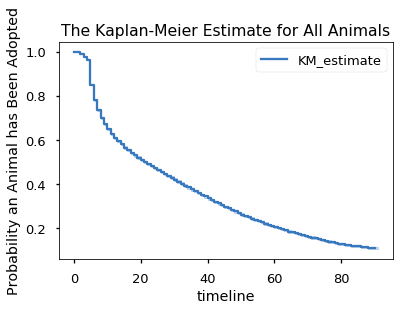

In [87]:
# plot the KM estimate
kmf.plot()
# Add title and y-axis label
plt.title("The Kaplan-Meier Estimate for All Animals")
plt.ylabel("Probability an Animal has Been Adopted")

plt.show()

In [100]:
kmf.fit(durations = cat_data.duration, 
        event_observed = cat_data.adopted)

<lifelines.KaplanMeierFitter: fitted with 25558 observations, 14735 censored>

,Animal_Type,adopted,duration
0,Dog,0,1
1,Dog,1,1
2,Dog,0,1
3,Dog,0,1
4,Dog,0,1
5,Dog,0,1
6,Dog,0,1
7,Dog,0,1
8,Dog,0,1
9,Dog,0,1


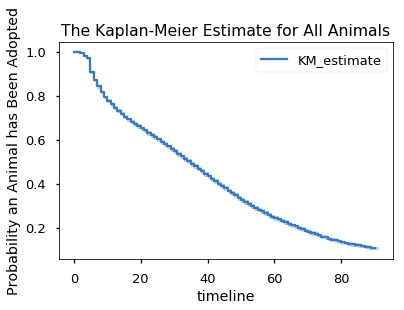

In [102]:
# plot the KM estimate
kmf.plot()
# Add title and y-axis label
plt.title("The Kaplan-Meier Estimate for All Animals")
plt.ylabel("Probability an Animal has Been Adopted")

plt.show()